# Unsupervised Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

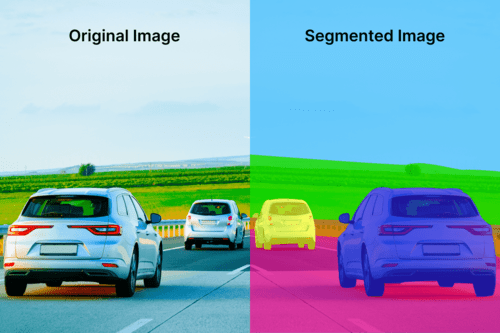

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

In [3]:
import cv2
import matplotlib.pyplot as plt

im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


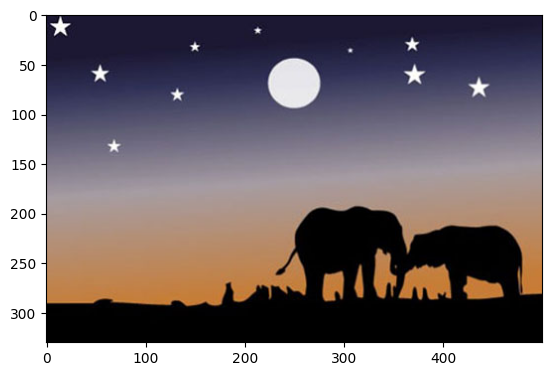

In [4]:
plt.imshow(im) # as RGB Format
plt.show()

In [5]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


Text(0, 0.5, 'wcss')

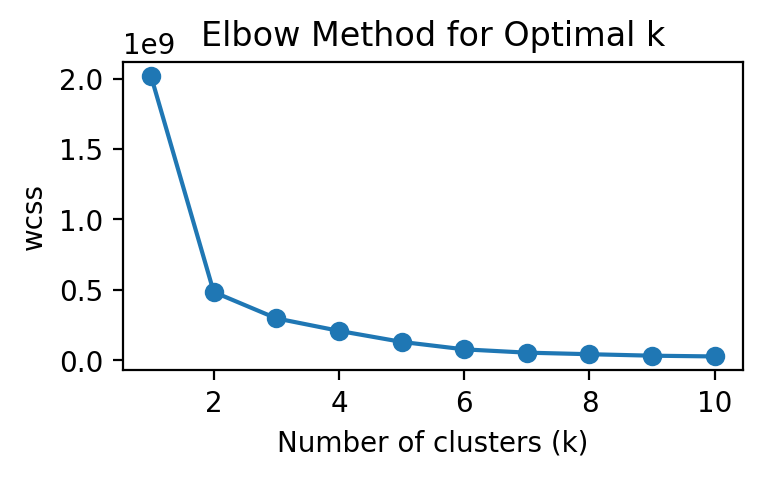

In [10]:
from sklearn.cluster import KMeans
wcss = []

for i in range(10):
    clustering = KMeans(n_clusters=i+1, init='k-means++', random_state=42)
    clustering.fit(all_pixels)
    wcss.append(clustering.inertia_)

ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.figure(figsize=(4, 2), dpi=200)
plt.plot(ks, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('wcss')

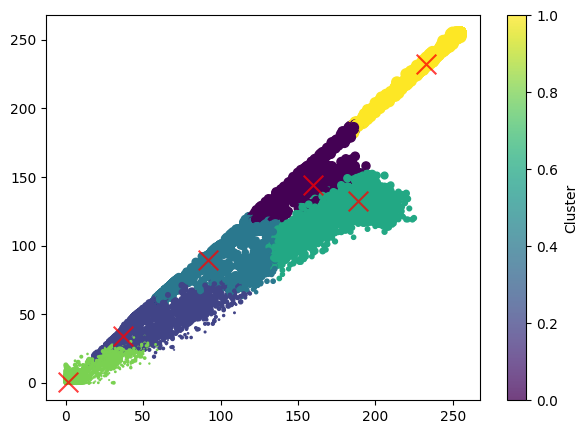

In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(all_pixels)
# Predict the cluster for each data point
clusters = kmeans.predict(all_pixels)

centers = kmeans.cluster_centers_
# Plot the clusters
plt.figure(figsize=(7, 5))
scatter = plt.scatter(all_pixels[:, 0], all_pixels[:, 1],all_pixels[:, 2], c=clusters, cmap='viridis', marker='.')
scatter = plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.colorbar(scatter, label='Cluster')
plt.show()

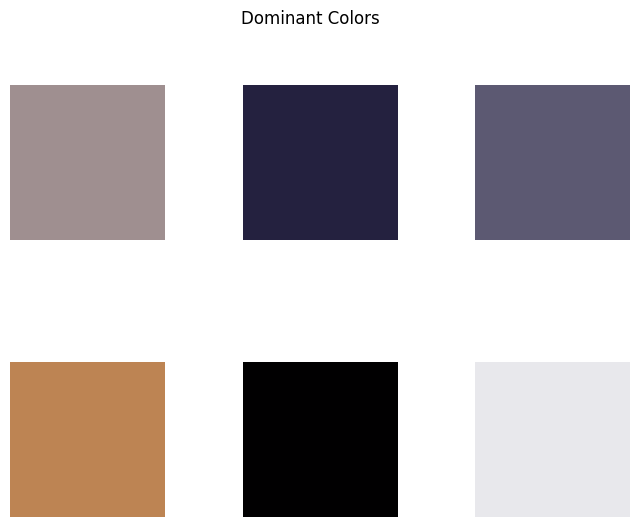

In [ ]:
#Plot the each of dominant color as image

# Get the cluster centers
centers = kmeans.cluster_centers_

# Ensure the centers are in the range [0, 255] and convert to integers
centers = np.clip(centers, 0, 255).astype(int)

# Create a figure with 2x3 subplots
fig, ax = plt.subplots(2, 3, figsize=(8, 6))

# Iterate over the cluster centers and plot each color as a square
for i, color in enumerate(centers):
    row = i // 3
    col = i % 3
    ax[row, col].imshow([[color]])  # Display the color as a square
    ax[row, col].axis('off')  # Turn off the axis

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Set the title
plt.suptitle('Dominant Colors')

# Show the plot
plt.show()


## Load Data

## Segmenting original image

In [ ]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


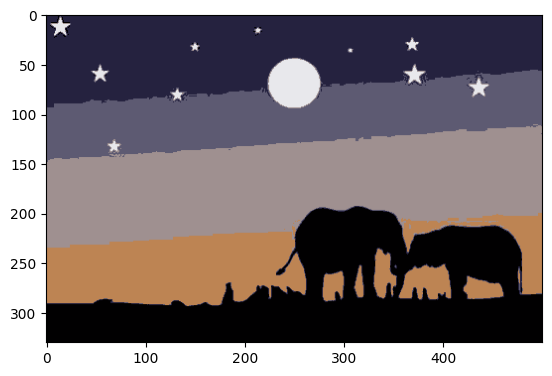

In [ ]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()

## YOLO8 Segmentation

In [ ]:
!git clone https://github.com/ultralytics/ultralytics.git

In [ ]:
!pip install ultralytics

In [7]:
!yolo task=segment mode=predict model='yolov8n-seg.pt' conf=0.25 source="/content/elephant.jpg" save=True

100% 6.74M/6.74M [00:00<00:00, 153MB/s]
Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,404,320 parameters, 0 gradients, 12.6 GFLOPs

image 1/1 /content/elephant.jpg: 448x640 1 airplane, 5 birds, 1 cow, 1 elephant, 1 frisbee, 115.2ms
Speed: 12.3ms preprocess, 115.2ms inference, 715.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


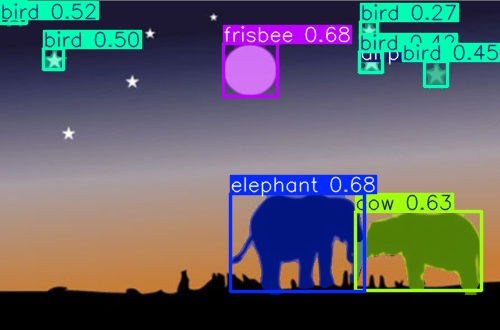

In [12]:
!pip install Ipython
from IPython.display import Image as imgshow
import os

imgshow('/content/ultralytics/runs/segment/predict/elephant.jpg', width = 600)